In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:/Users/shrik/Spam filter/spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3486,ham,Change windows logoff sound..,NaN,NaN,NaN
2283,ham,I reach home safe n sound liao...,NaN,NaN,NaN
1883,ham,"Come to me, slave. Your doing it again ... Goi...",NaN,NaN,NaN
4310,ham,It so happens that there r 2waxsto do wat you ...,NaN,NaN,NaN
1471,ham,Oh. U must have taken your REAL Valentine out ...,NaN,NaN,NaN


In [5]:
df.shape()

TypeError: 'tuple' object is not callable

In [6]:
df.shape

(5572, 5)

In [7]:
#Data cleaning 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
dtypes: object(3)
memory usage: 130.7+ KB


In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5572 non-null   object
 1   text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
dtypes: object(3)
memory usage: 130.7+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
df['target']=encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text,Unnamed: 2
0,0,"Go until jurong point, crazy.. Available only ...",NaN
1,0,Ok lar... Joking wif u oni...,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,0,U dun say so early hor... U c already then say...,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN


In [16]:
#missing values

df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(403)

In [18]:
df=df.drop_duplicates(keep='first')

In [19]:
df.shape

(5169, 3)


# EDA


In [20]:
df.head()

,target,text,Unnamed: 2
0,0,"Go until jurong point, crazy.. Available only ...",NaN
1,0,Ok lar... Joking wif u oni...,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,0,U dun say so early hor... U c already then say...,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

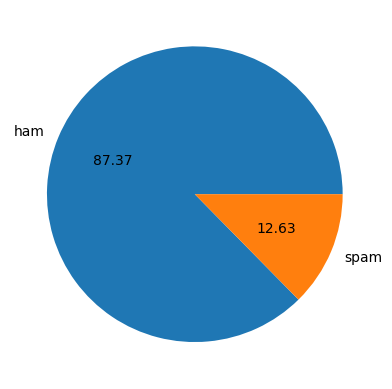

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [23]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Data is imbalanced

In [20]:
!pip install nltk

In [21]:
import nltk

In [22]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shrik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
#number of character
df['num_characters']=df['text'].apply(len)

In [24]:
df.head()

,target,text,Unnamed: 2,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61


In [25]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

In [28]:
df.head()

,target,text,Unnamed: 2,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns


In [33]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='num_characters', ylabel='Count'>

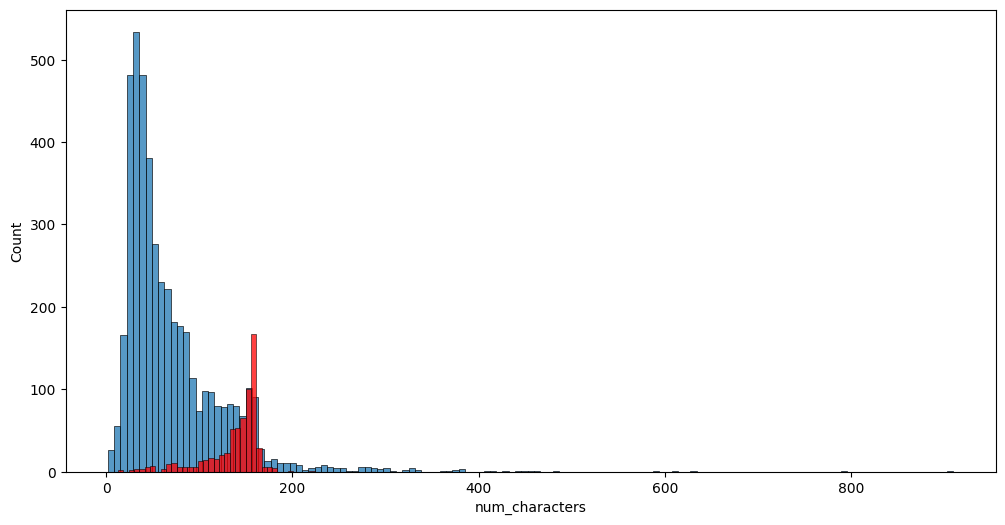

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

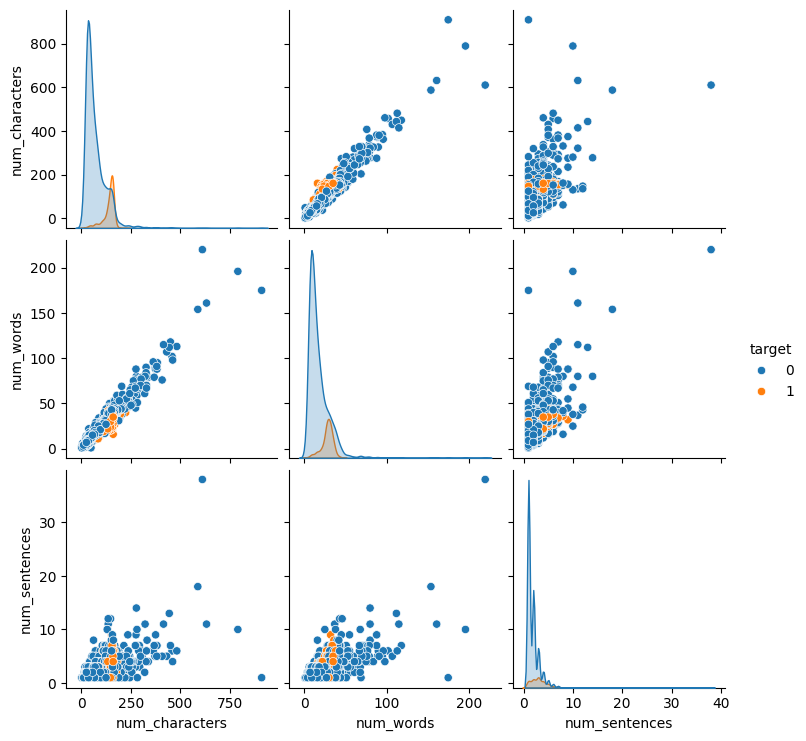

In [40]:
sns.pairplot(df,hue='target')

<Axes: >

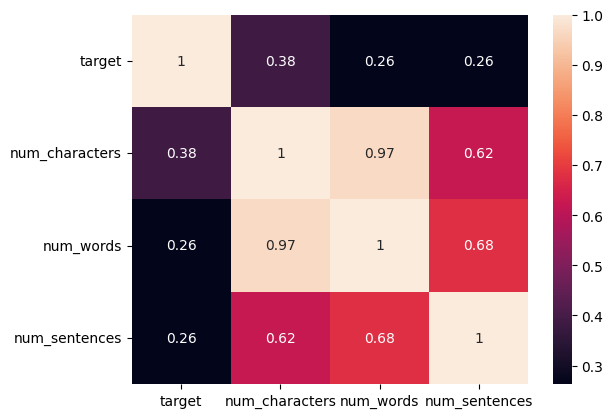

In [41]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(),annot=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int64 
 1   text            5169 non-null   object
 2   Unnamed: 2      43 non-null     object
 3   num_characters  5169 non-null   int64 
 4   num_words       5169 non-null   int64 
 5   num_sentences   5169 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 282.7+ KB


In [35]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [37]:
import string
from nltk.corpus import stopwords

In [38]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [39]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shrik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [40]:
import nltk

In [41]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shrik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [42]:
df['text'][15]

'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'

In [43]:
transform_text("XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL")

'xxxmobilemovieclub use credit click wap link next txt messag click http'

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,Unnamed: 2,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15,1,nah think goe usf live around though


In [55]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


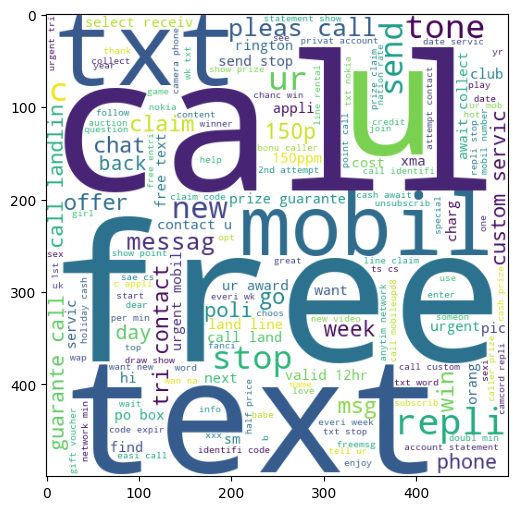

In [57]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

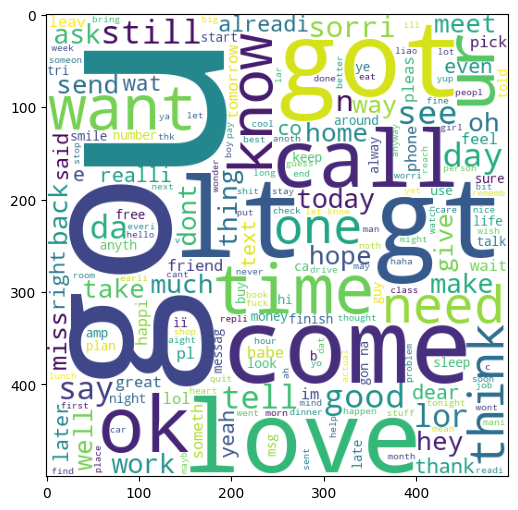

In [58]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [47]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

In [49]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [50]:
df.head()

,target,text,Unnamed: 2,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15,1,nah think goe usf live around though


In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
y = df['target'].values

In [64]:
X.shape

(5169, 3000)

In [55]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [65]:
from imblearn.over_sampling import SMOTE


In [66]:
# Apply SMOTE after transforming text
smote = SMOTE(random_state=0)
X,y=smote.fit_resample(X, y)

In [68]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [74]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9241837299391257
[[770 136]
 [  1 900]]
0.8687258687258688


In [75]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9673491975650249
[[876  30]
 [ 29 872]]
0.9667405764966741


In [76]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9767570558937465
[[906   0]
 [ 42 859]]
1.0


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [78]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [79]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [81]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9667957941339236, np.float64(0.9459172852598091))

In [82]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9667957941339236
Precision -  0.9459172852598091
For  KN
Accuracy -  0.6009961261759823
Precision -  0.55625
For  NB
Accuracy -  0.9673491975650249
Precision -  0.9667405764966741
For  DT
Accuracy -  0.8865522966242391
Precision -  0.9371859296482412
For  LR
Accuracy -  0.9335915882678473
Precision -  0.965435041716329
For  RF
Accuracy -  0.9944659656889873
Precision -  0.9922651933701657


C:\Users\shrik\Downloads\Python 37\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.961261759822911
Precision -  0.981460023174971
For  BgC
Accuracy -  0.9701162147205312
Precision -  0.9510117145899893
For  ETC
Accuracy -  0.9928057553956835
Precision -  0.9868421052631579
For  GBDT
Accuracy -  0.9263973436635307
Precision -  0.9454756380510441


In [83]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [84]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.994466,0.992265
8,ETC,0.992806,0.986842
6,AdaBoost,0.961262,0.981460
2,NB,0.967349,0.966741
4,LR,0.933592,0.965435
7,BgC,0.970116,0.951012
0,SVC,0.966796,0.945917
9,GBDT,0.926397,0.945476
3,DT,0.886552,0.937186
1,KN,0.600996,0.556250


In [77]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [78]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,AdaBoost,Accuracy,0.969052
6,LR,Accuracy,0.955513
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.931335


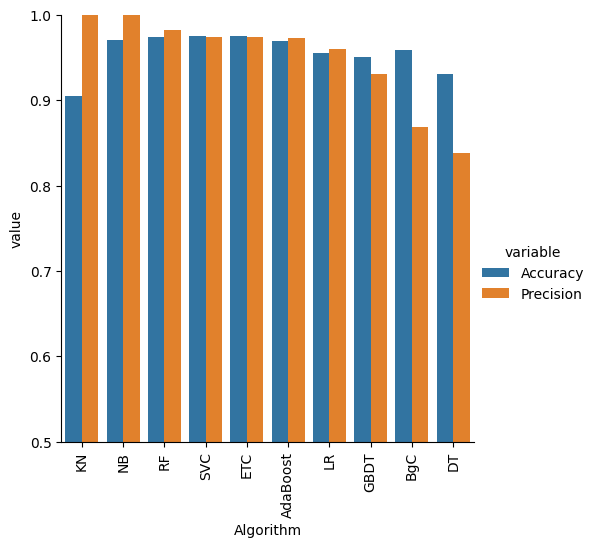

In [79]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [80]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [81]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [82]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [83]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [85]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,AdaBoost,0.969052,0.973214,0.969052,0.973214,0.969052,0.973214,0.969052,0.973214
6,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.931335,0.838384,0.931335,0.838384,0.931335,0.838384,0.931335,0.838384


In [85]:
import pickle

pickle.dump(rfc,open('model.pkl','wb'))